<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
#Load the data
df = pd.read_csv("https://query.data.world/s/kqypnd7fjxl4xq4jlebrgudfqyxd7j")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.shape

(1310, 14)

In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of       pclass  survived  ...   body                        home.dest
0        1.0       1.0  ...    NaN                     St Louis, MO
1        1.0       1.0  ...    NaN  Montreal, PQ / Chesterville, ON
2        1.0       0.0  ...    NaN  Montreal, PQ / Chesterville, ON
3        1.0       0.0  ...  135.0  Montreal, PQ / Chesterville, ON
4        1.0       0.0  ...    NaN  Montreal, PQ / Chesterville, ON
...      ...       ...  ...    ...                              ...
1305     3.0       0.0  ...    NaN                              NaN
1306     3.0       0.0  ...  304.0                              NaN
1307     3.0       0.0  ...    NaN                              NaN
1308     3.0       0.0  ...    NaN                              NaN
1309     NaN       NaN  ...    NaN                              NaN

[1310 rows x 14 columns]>

In [ ]:
#divide the data into the training and testing subsets
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

#we set random_state=1 to guarantee that the split will

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["survived"], axis=1),   #X
    df["survived"], #y
    test_size = 0.30,
    random_state=1
) 

print("Train set size %d" %X_train.shape[0])

Train set size 917


In [ ]:
#Training set information
#['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
#dropping some non-useful features
X_train.drop(["name","cabin","ticket","boat","body", "home.dest"], axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 306 to 1061
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    float64
 1   sex       916 non-null    object 
 2   age       734 non-null    float64
 3   sibsp     916 non-null    float64
 4   parch     916 non-null    float64
 5   fare      915 non-null    float64
 6   embarked  914 non-null    object 
dtypes: float64(5), object(2)
memory usage: 57.3+ KB


In [ ]:
X_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [ ]:
#Joining the training data to make the plots
data = X_train.copy()
data["Survived"] = y_train
data.replace({"survived": {0: "No", 1: "Yes"}}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 306 to 1061
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    916 non-null    float64
 1   sex       916 non-null    object 
 2   age       734 non-null    float64
 3   sibsp     916 non-null    float64
 4   parch     916 non-null    float64
 5   fare      915 non-null    float64
 6   embarked  914 non-null    object 
 7   Survived  916 non-null    float64
dtypes: float64(6), object(2)
memory usage: 64.5+ KB


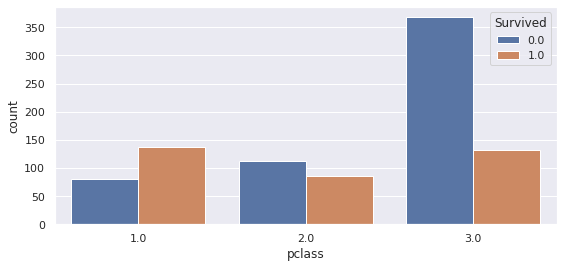

In [ ]:
#Passenger distribution by class
sns.set(rc={"figure.figsize": (9, 4)})
sns.countplot(x="pclass", hue="Survived", data=data)


NameError: ignored

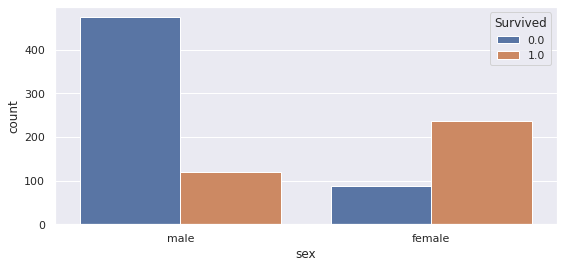

In [ ]:
#Passenger distribution by sex
sns.countplot(x="sex", hue="Survived", data=data)
z.show(sns.plt)
sns.plt.close()